In [1]:
from superminddpm import DDPM, DummyEpsModel
import torch
import matplotlib.pyplot as plt
from mindiffusion.ddim import DDIM
from utils import plot_samples

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DDIM(eps_model=DummyEpsModel(1), betas=(1e-4, 0.02), eta=0, n_T=1000)
model.load_state_dict(torch.load("./contents/ddpm_mnist.pth", map_location=device))
model.to(device)
model.eval();

In [3]:
n_sample = 2
size = (1, 28, 28)
starting_noise = torch.randn(1, *size).to(device).repeat((n_sample, 1, 1, 1))
with torch.no_grad():
    x = model.sample(n_sample, size, device, starting_noise=starting_noise)

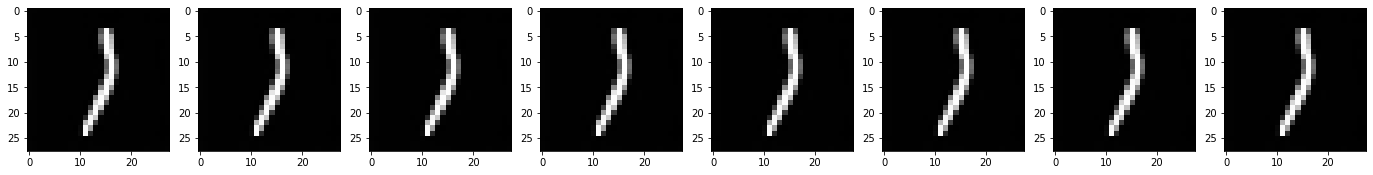

In [4]:
plot_samples(x)

## Does neighbors in the noise space give similar images?

In [91]:
def get_interps(start, end, num):
    interps = []
    for i in range(num):
        interps.append(torch.lerp(start, end, weight=i/(num - 1)))
    interps = torch.cat([interp[None, ...] for interp in interps], dim=0)
    return interps


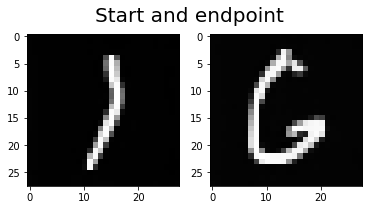

In [39]:
start_point = starting_noise[0].clone()
end_point = torch.randn(1, 28, 28).to(device)
with torch.no_grad():
    x_end_point = model.sample(1, size, device, starting_noise=end_point[None, ...])
plot_samples(torch.cat([x[0:1], x_end_point], dim=0), title="Start and endpoint")

In [45]:
interps = []
interp_points = 40
for i in range(interp_points):
    interps.append(torch.lerp(start_point, end_point, weight=i/(interp_points - 1)))
interps = torch.cat([interp[None, ...] for interp in interps], dim=0)
interps.shape

torch.Size([40, 1, 28, 28])

In [47]:
with torch.no_grad():
    x = model.sample(interp_points, size, device, starting_noise=interps)

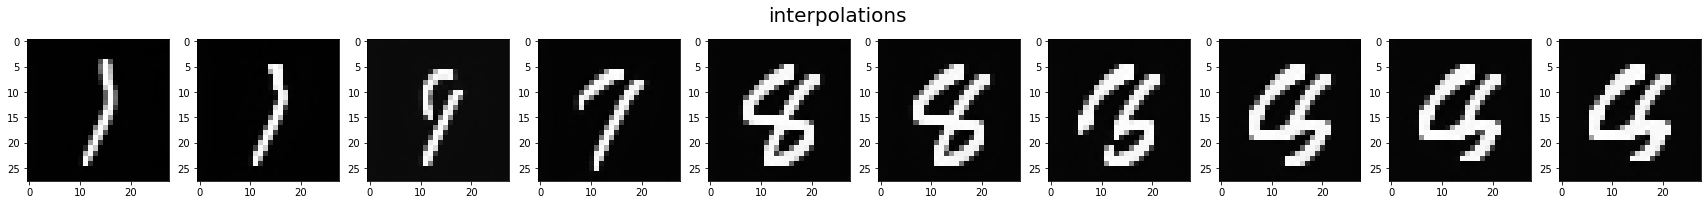

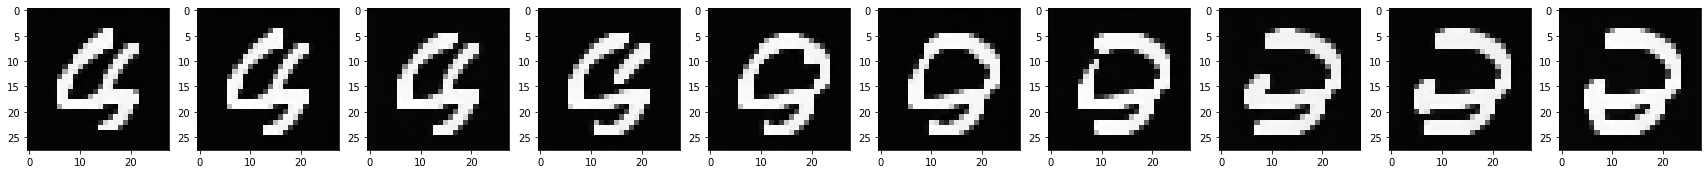

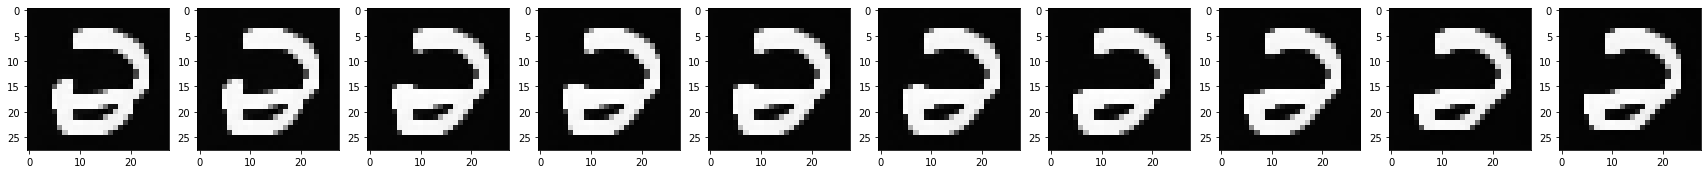

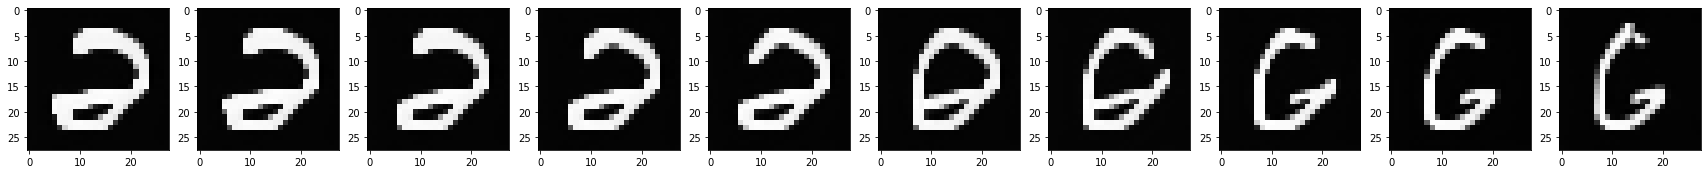

In [52]:
plot_samples(x[0:10], title="interpolations")
plot_samples(x[10:20])
plot_samples(x[20:30])
plot_samples(x[30:40])

## With colors

In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DDIM(eps_model=DummyEpsModel(3), betas=(1e-4, 0.02), eta=0, n_T=1000)
model.load_state_dict(torch.load("./contents/colors2/ddpm_mnist_colors.pth", map_location=device))
model.to(device)
model.eval();

In [64]:
n_sample = 2
size = (3, 28, 28)
starting_noise = torch.randn(1, *size).to(device).repeat((n_sample, 1, 1, 1))
with torch.no_grad():
    x = model.sample(n_sample, size, device, starting_noise=starting_noise)

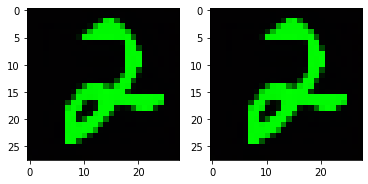

In [65]:
plot_samples(x, normalize=True)

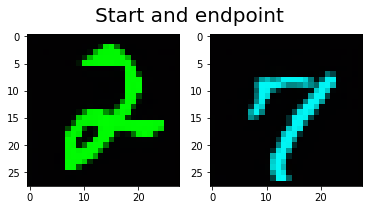

In [68]:
start_point = starting_noise[0].clone()
end_point = torch.randn(3, 28, 28).to(device)
with torch.no_grad():
    x_end_point = model.sample(1, size, device, starting_noise=end_point[None, ...])
plot_samples(torch.cat([x[0:1], x_end_point], dim=0), title="Start and endpoint", normalize=True)

In [95]:
interps = get_interps(start_point, end_point, 40)

In [96]:
with torch.no_grad():
    x = model.sample(interp_points, size, device, starting_noise=interps)

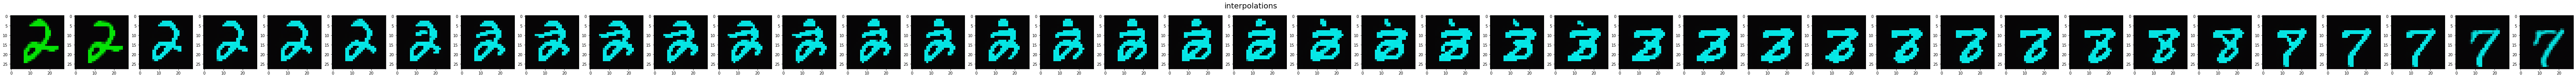

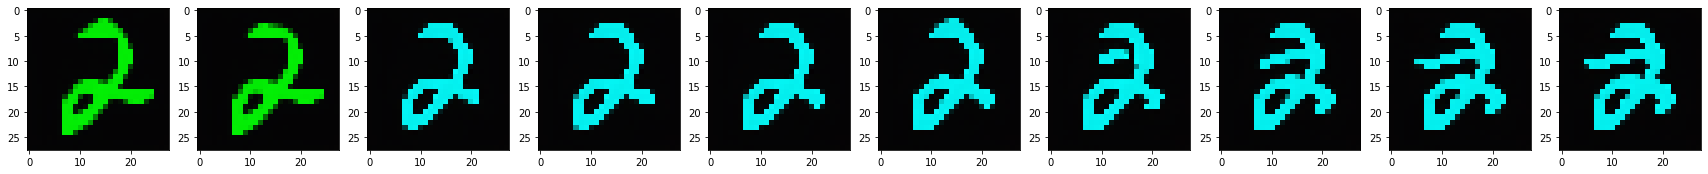

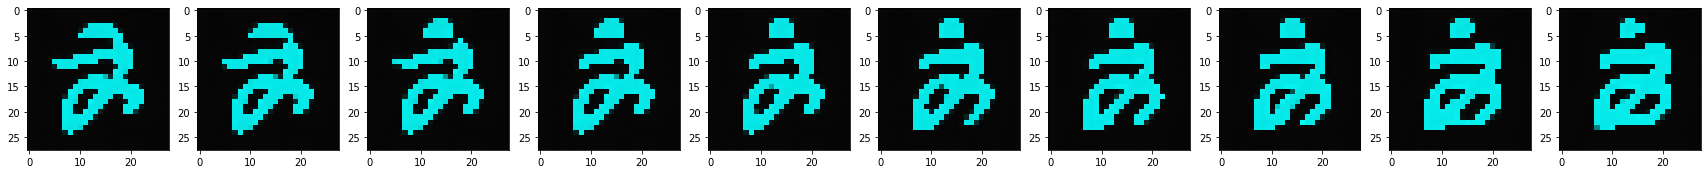

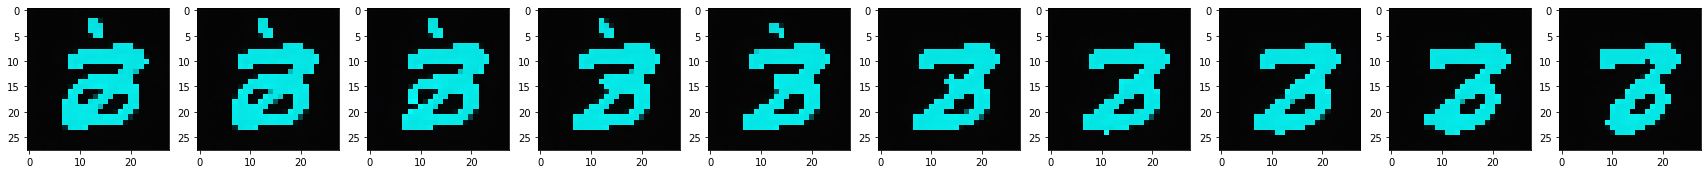

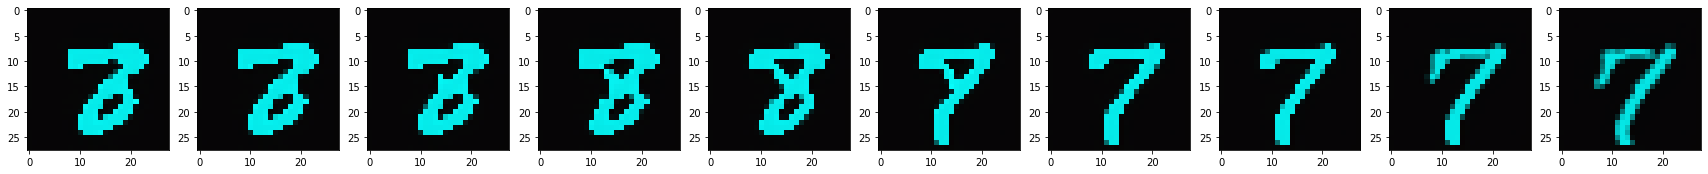

In [74]:
plot_samples(x, title="interpolations", normalize=True)
plot_samples(x[0:10], normalize=True)
plot_samples(x[10:20], normalize=True)
plot_samples(x[20:30], normalize=True)
plot_samples(x[30:40], normalize=True)

## Inspect color change

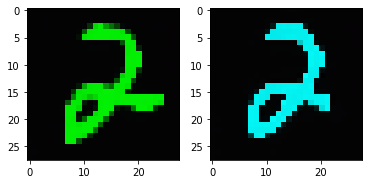

In [85]:
start_point = x[1]
end_point = x[2]
plot_samples(torch.cat([start_point[None, ...], end_point[None, ...]], dim=0), normalize=True)

In [92]:
new_interps = get_interps(start_point, end_point, 40)

In [93]:
with torch.no_grad():
    x = model.sample(new_interp_points, size, device, starting_noise=new_interps)

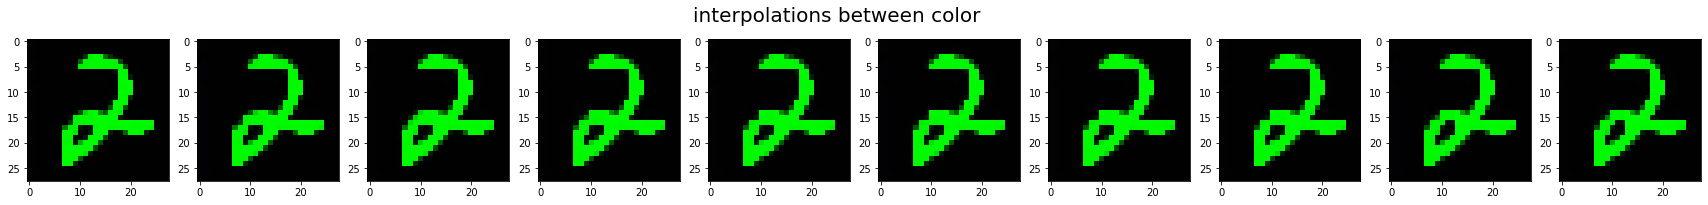

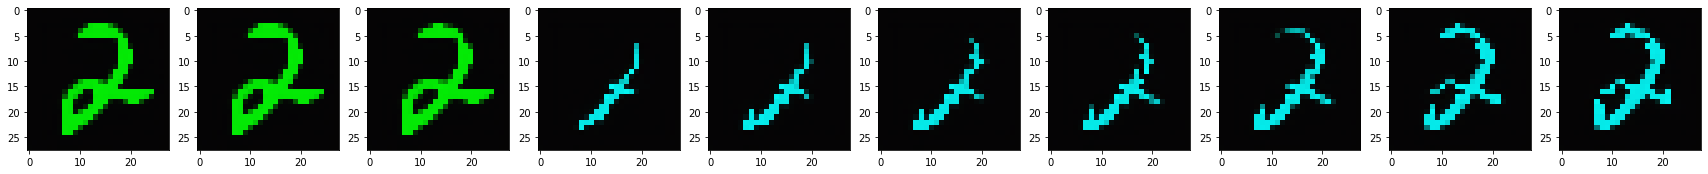

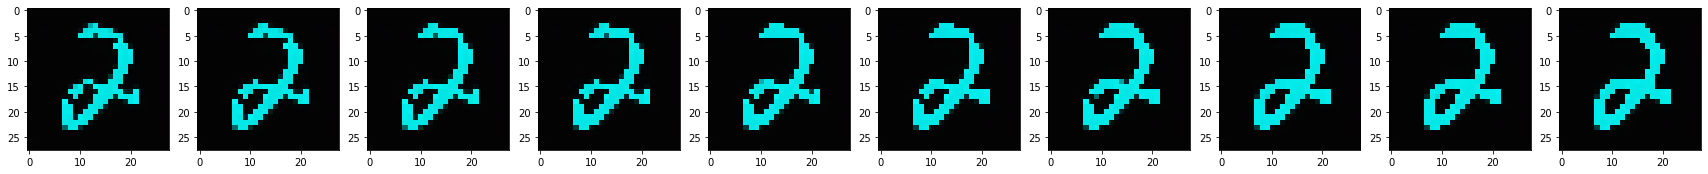

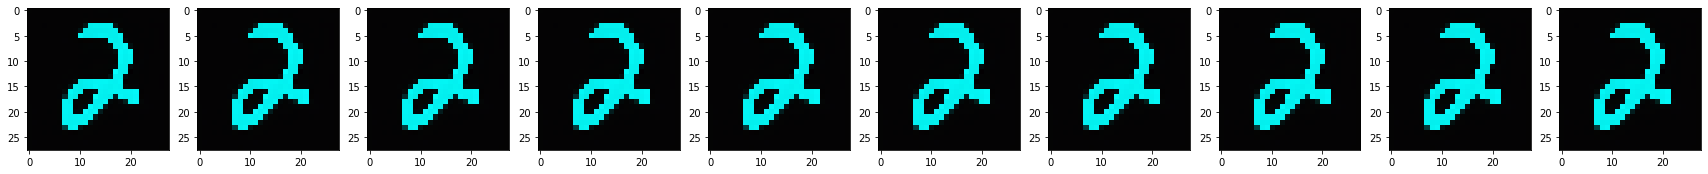

In [94]:
plot_samples(x[0:10], title="interpolations between color", normalize=True)
plot_samples(x[10:20], normalize=True)
plot_samples(x[20:30], normalize=True)
plot_samples(x[30:40], normalize=True)

### One more time

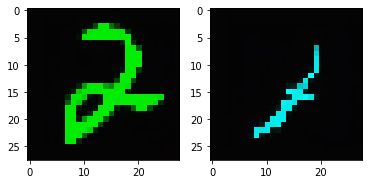

In [97]:
start_point = x[12]
end_point = x[13]
plot_samples(torch.cat([start_point[None, ...], end_point[None, ...]], dim=0), normalize=True)

In [98]:
new_interps = get_interps(start_point, end_point, 40)
with torch.no_grad():
    x = model.sample(new_interp_points, size, device, starting_noise=new_interps)

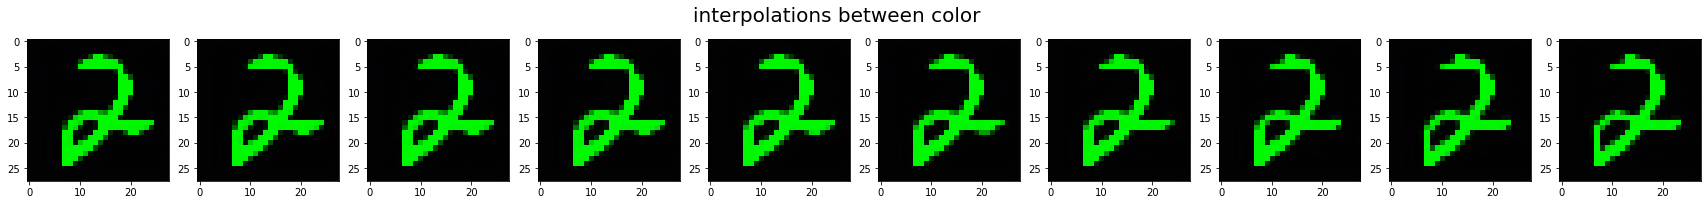

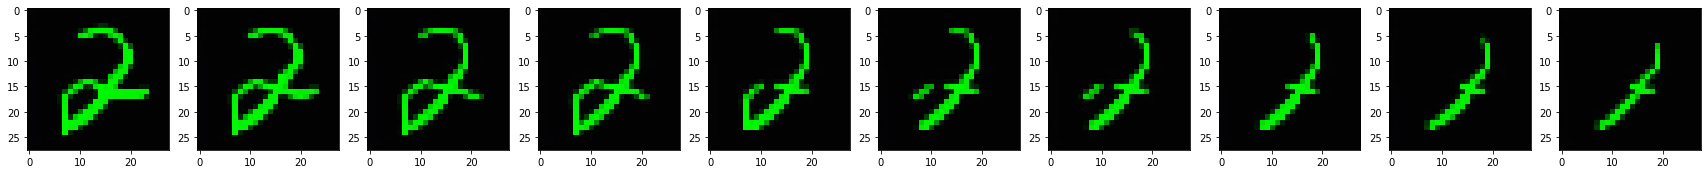

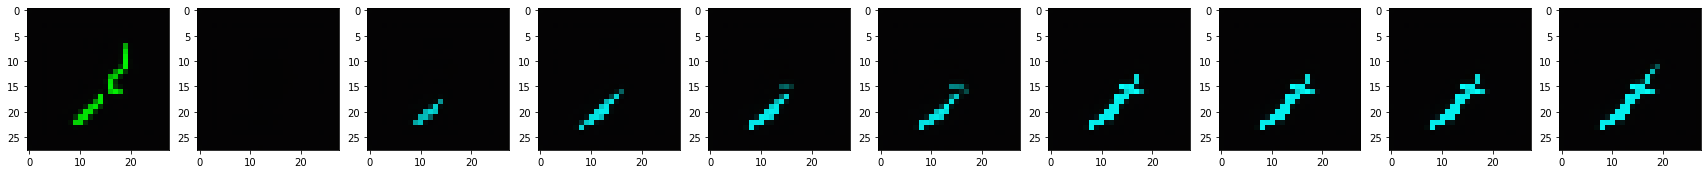

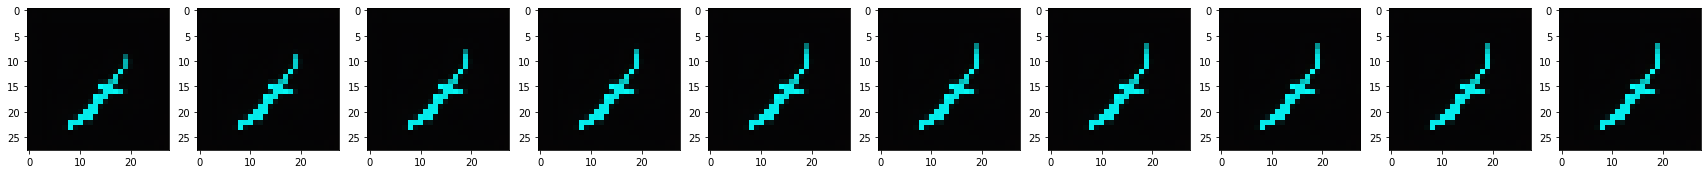

In [99]:
plot_samples(x[0:10], title="interpolations between color", normalize=True)
plot_samples(x[10:20], normalize=True)
plot_samples(x[20:30], normalize=True)
plot_samples(x[30:40], normalize=True)